In [7]:
import os
import tarfile
import zipfile
import hashlib
import requests

In [32]:
DATA_HUB=dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [26]:
def download(name,cache_dir=os.path.join('..','data')):
    assert name in DATA_HUB,f"{name} not exist in {DATA_HUB}"
    url,sha1_hash=DATA_HUB[name]
    os.mkdir(cache_dir,exist_ok=True)
    fname=os.path.join(cache_dir,url.split('/')[-1])
    if os.path.exists(fname):
        sha1=hashlib.sha1()
        with open(fname,'rb') as f:
            while True:
                data=f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if (sha1.hexdigest==sha1_hash):
            return fname
    print(f'downloading{fname} from {url}')
    r=requestes.get(url,stream=True,verify=True)
    with open(fname,'wb') as f:
          f.write(r.content)
    return fname

def download_extract(name,folder=None):
    fname=download(name)
    base_dir=os.path.dirname(fname)
    data_dir,ext =os.path.splitext(fname)
    if ext=='.zip':
        fp =zipfile.ZipFile(fname,'r')
    elif ext in ('.tar','.gz'):
        fp=tarfile.open(fname,'r')
    else:
        assert False, 'only zip/tar can be extracted'
    fp.extractall(base_dir)
    return os.path.join(base_dir,folder) if folder else data_dir
def download_all():
    for name in DATA_HUB:
        download(name)
    

In [150]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [151]:
DATA_HUB['kaggle_house_train']=(  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')
DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')
train_data=pd.read_csv(download("kaggle_house_train"))
test_data=pd.read_csv(download("kaggle_house_test"))

In [164]:
print(train_data.shape,test_data.shape)
print(train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]])
all_features=pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:]))
?pd.DataFrame.fillna

(1460, 81) (1459, 80)
   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


Signature:
pd.DataFrame.fillna(
    self,
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
) -> 'Optional[DataFrame]'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify an

In [168]:
###normal:
num_features=all_features.dtypes[all_features.dtypes!='object'].index
all_features[num_features]=all_features[num_features].apply(lambda x: (x-x.mean())/(x.std()))
#all_features[num_features]=all_features[num_features].fillna(0)
all_features[num_features].fillna(0)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,...,0.348840,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,...,-0.059782,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,...,0.627446,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,...,0.785323,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,...,1.686149,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-2.266564,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.572152,-0.969026,-0.29308,...,-2.195761,-0.740634,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,-1.363335
1455,2.419286,-2.266564,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.572152,-0.415828,-0.29308,...,-0.867740,-0.740634,-0.347564,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.815205,-1.363335
1456,-0.873466,4.255477,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.572152,1.717937,-0.29308,...,0.478856,3.005615,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,-1.363335
1457,0.655311,-0.342796,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.572152,-0.229233,-0.29308,...,-2.195761,-0.108355,-0.229178,-0.359539,-0.103313,-0.285886,-0.063139,1.144116,0.289865,-1.363335


In [169]:
all_features=pd.get_dummies(all_features,dummy_na=True)
print(all_features.shape)


(2919, 331)


In [170]:
n_train=train_data.shape[0]
train_features=torch.tensor(all_features.iloc[0:n_train,:].values,dtype=torch.float)
test_features=torch.tensor(all_features.iloc[n_train:,:].values,dtype=torch.float)
labels=torch.tensor(train_data.SalePrice.values.reshape(-1,1),dtype=torch.float)

In [171]:
loss= nn.MSELoss()
in_features=train_features.shape[1]

def get_net():
    net=nn.Sequential(nn.Linear(in_features,1))
    return net

def log_rmse(net,features,labels):
    clip_pred=torch.clamp(net(features),1,float('inf'))
    rmse=torch.sqrt(loss(torch.log(clip_pred),torch.log(labels)))
    return rmse.item()


In [172]:
def train(net,train_features,train_labels,test_features,test_labels,num_epochs,learning_rate,weight_decay,batch_size):
    optimizer=torch.optim.Adam(net.parameters(),lr=learning_rate,weight_decay=weight_decay)
    train_ls,test_ls=[],[]
    #print(train_features,train_labels)
    train_iter=d2l.load_array((train_features,train_labels),batch_size)
    
    for epoch in range(num_epochs):
        for X,y in train_iter:
            optimizer.zero_grad()
            l=loss(net(X),y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net,test_features,test_labels))
    return train_ls,test_ls

def get_k_fold_data(k,i,X,y):
    assert k>1
    fold_size=X.shape[0]//k
    Xtrain,ytrain=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        xpart,ypart=X[idx,:],y[idx]
        if j==i:
            Xvalid,yvalid=xpart,ypart
        elif Xtrain is None:
            Xtrain,ytrain=xpart,ypart
        else:
            Xtrain=torch.cat([Xtrain,xpart],0)
            ytrain=torch.cat([ytrain,ypart],0)
    return Xtrain,ytrain,Xvalid,yvalid
# def get_k_fold_data(k, i, X, y):
#     assert k > 1
#     fold_size = X.shape[0] // k
#     X_train, y_train = None, None
#     for j in range(k):
#         idx = slice(j * fold_size, (j + 1) * fold_size)
#         X_part, y_part = X[idx, :], y[idx]
#         if j == i:
#             X_valid, y_valid = X_part, y_part
#         elif X_train is None:
#             X_train, y_train = X_part, y_part
#         else:
#             X_train = torch.cat([X_train, X_part], 0)
#             y_train = torch.cat([y_train, y_part], 0)
#     return X_train, y_train, X_valid, y_valid

In [173]:
def k_fold(k,xtrain,ytrain,num_epochs,learning_rate,weight_decay,batch_size):
    train_l_sum,valid_l_sum=0,0
    for i in range(k):
        #print(xtrain,ytrain)
        data=get_k_fold_data(k,i,xtrain,ytrain)
        net=get_net()
        #print(type(data))
        train_ls,valid_ls=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        train_l_sum+=train_ls[-1]
        valid_l_sum+=valid_ls[-1]
        if i==0:
            d2l.plot(list(range(1,num_epochs+1)),[train_ls,valid_ls],xlabel='epoch',ylabel='rmse',xlim=[1,num_epochs],legend=['train','valid'],yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')     
    return train_l_sum/k,valid_l_sum/k

fold 1, train log rmse 0.154445, valid log rmse 0.150981
fold 2, train log rmse 0.149980, valid log rmse 0.167470
fold 3, train log rmse 0.148249, valid log rmse 0.153756
fold 4, train log rmse 0.153506, valid log rmse 0.148428
fold 5, train log rmse 0.147489, valid log rmse 0.176048
5 fold validation: mean train log rmse:0.150734,mean validate log rmse:0.159337


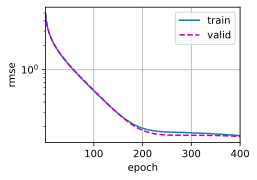

In [203]:
k,epochs,weight_decay,lr=5,400,0.0,1.5

train_l_mean,valid_l_mean=k_fold(k,train_features,labels,epochs,lr,weight_decay,batch_size=64)
print(f'{k} fold validation: mean train log rmse:{float(train_l_mean):f},'
     f'mean validate log rmse:{float(valid_l_mean):f}')

In [206]:
def train_and_pred(train_features,train_labels,test_features,test_data,num_epochs,lr,weight_decay,batchsize):
    net=get_net()
    train_ls,_=train(net,train_features,train_labels,None,None,num_epochs,lr,weight_decay,batch_size=batchsize)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    pred=net(test_features).detach().numpy()
    test_data['SalePrice']=pd.Series(pred.reshape(1,-1)[0])
    submission=pd.concat([test_data['Id'],test_data['SalePrice']],axis=1)
    submission.to_csv('submission.csv',index=False)

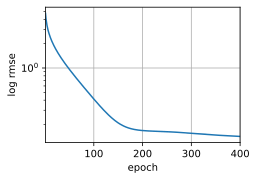

In [207]:
k,epochs,weight_decay,lr,batchsize=5,400,0.0,1.5,64
train_and_pred(train_features,labels,test_features,test_data,num_epochs=epochs,lr=lr,weight_decay=weight_decay,batchsize=batchsize)